In [1]:
import seaborn as sns
import pandas as pd

df = sns.load_dataset("tips")


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [5]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [6]:
df.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [7]:
grouped_day_sex = (
    df
    .groupby(["day", "sex"])
    .agg(
        avg_total_bill=("total_bill", "mean"),
        avg_tip=("tip", "mean")
    )
)

grouped_day_sex

C:\Users\igole\AppData\Local\Temp\ipykernel_10760\3110458125.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["day", "sex"])


avg_total_bill   avg_tip
day  sex                             
Thur Male         18.714667  2.980333
     Female       16.715312  2.575625
Fri  Male         19.857000  2.693000
     Female       14.145556  2.781111
Sat  Male         20.802542  3.083898
     Female       19.680357  2.801786
Sun  Male         21.887241  3.220345
     Female       19.872222  3.367222

In [8]:
df["tip_rate"] = df["tip"] / df["total_bill"]

In [9]:
tip_rate_day_time = (
    df
    .groupby(["day", "time"])
    .agg(avg_tip_rate=("tip_rate", "mean"))
)

tip_rate_day_time.round(3)

C:\Users\igole\AppData\Local\Temp\ipykernel_10760\422855564.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  .groupby(["day", "time"])


avg_tip_rate
day  time                
Thur Lunch          0.161
     Dinner         0.160
Fri  Lunch          0.189
     Dinner         0.159
Sat  Lunch            NaN
     Dinner         0.153
Sun  Lunch            NaN
     Dinner         0.167

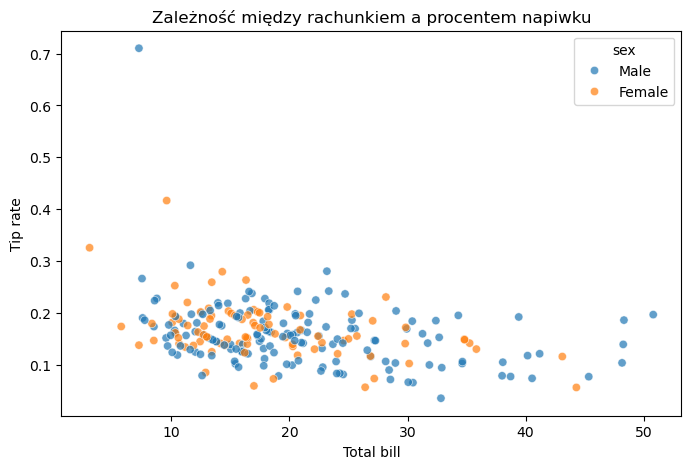

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df,
    x="total_bill",
    y="tip_rate",
    hue="sex",
    alpha=0.7
)

plt.title("Zależność między rachunkiem a procentem napiwku")
plt.xlabel("Total bill")
plt.ylabel("Tip rate")
plt.show()

In [12]:
df["is_weekend"] = df["day"].isin(["Sat", "Sun"])


In [13]:
df.groupby("is_weekend")["tip_rate"].mean() * 100


is_weekend
False    16.330169
True     15.956069
Name: tip_rate, dtype: float64

Poziom napiwków w weekend jest niższy niż w tygodniu.

In [14]:
df.groupby("sex")["tip_rate"].mean() * 100


C:\Users\igole\AppData\Local\Temp\ipykernel_10760\910543326.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("sex")["tip_rate"].mean() * 100


sex
Male      15.765055
Female    16.649074
Name: tip_rate, dtype: float64

In [15]:
df.groupby("time")["tip_rate"].mean() * 100


C:\Users\igole\AppData\Local\Temp\ipykernel_10760\3430487167.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("time")["tip_rate"].mean() * 100


time
Lunch     16.412793
Dinner    15.951779
Name: tip_rate, dtype: float64

In [16]:
df.groupby(["sex", "time"])["tip_rate"].mean() * 100


C:\Users\igole\AppData\Local\Temp\ipykernel_10760\2413250837.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby(["sex", "time"])["tip_rate"].mean() * 100


sex     time  
Male    Lunch     16.608263
        Dinner    15.540653
Female  Lunch     16.228493
        Dinner    16.932157
Name: tip_rate, dtype: float64

Najwyższy średni procent napiwków zostawiaja kobiety podczas kolacji.